# Contour Maps

```{contents}
:local:
```

This section is highly visual based. This is best coupled with the resources in the Further Readings section.
The code here make uses of Multivariate Gaussian Distribution to generate the code, but the concepts are applicable to any function
and does not require any knowledge of the Multivariate Gaussian Distribution.

## Definition

```{prf:definition} Countour Lines (Levels)
:label: def:contour_lines

A contour line (also isoline, isopleth, or isarithm) of a function of two variables is a
curve along which the function has a constant value, so that the curve joins points of equal value.

Consider the function $z = f(x, y)$, where $x$ and $y$ are two variables and $z$ is the corresponding
value of the function. A contour line of $f$ is a curve in the $xy$-plane such that $f$ has the same
value at all points on the curve. The value of $f$ at any point on the curve is called the contour
value. 
```

```{prf:definition} Contour Map/Plot
:label: def:contour_map

A contour map (also contour plot, contour chart, or level curves) is a graphical technique that illustrates
a three-dimensional surface by plotting constant $z$ slices of contour lines on a two-dimensional plane.
```

## Example

Consider a random vector 

$$
\boldsymbol{X} = \begin{bmatrix} X_1 \\ X_2 \end{bmatrix}
$$
 
with two components which follows a
multivariate Gaussian distribution with mean and covariance matrix

$$
\mu = \begin{bmatrix} 0 \\ 0 \end{bmatrix} \quad \text{and} \quad \Sigma = \begin{bmatrix} 3 & 0 \\ 0 & 15 \end{bmatrix}
$$

By construction, this random vector has independent components. Then {eq}`eq:independent_multivariate_gaussian_pdf` tells us that the
probability density function of this random vector is given by

$$
f_{\boldsymbol{X}}(\boldsymbol{x}) = \prod_{d=1}^{D=2} \frac{1}{\sqrt{2 \pi \sigma_d^2}} \exp \left( - \frac{(x_d - \mu_d)^2}{2 \sigma_d^2} \right)
$$

or equivalently by definition {prf:ref}`def:multivariate_gaussian` as

$$
f_{\boldsymbol{X}}(\boldsymbol{x}) = \frac{1}{\sqrt{(2 \pi)^2 \lvert \Sigma \rvert}} \exp \left( - \frac{1}{2} (\boldsymbol{x} - \boldsymbol{\mu})^T \Sigma^{-1} (\boldsymbol{x} - \boldsymbol{\mu}) \right)
$$

where $\boldsymbol{x} = (x_1, x_2)^T$.


Then we can represent the probability density function of this random vector as a function of two variables

$$
Z \overset{\text{def}}{=} f(X_1, X_2)
$$

where $f(X_1, X_2)$ corresponds to the probability density function of the random vector $\boldsymbol{X}$.

Then we construct a contour map of the function $f(X_1, X_2)$ by plotting the contour lines of the function $f(X_1, X_2)$.

This is helpful for visualization.


We first define the variables below and code up a simple
function to return the probability density function of the random vector $\boldsymbol{X}$.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from typing import Any, Dict
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits
from matplotlib.contour import QuadContourSet

# Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

mean_vector = np.array([mu_x, mu_y])
covariance_matrix = np.array([[variance_x, 0], [0, variance_y]])  # independence

covariance_matrix_inverse = np.linalg.inv(covariance_matrix)
covariance_matrix_determinant = np.linalg.det(covariance_matrix)
print(covariance_matrix_inverse, covariance_matrix_determinant)

[[0.33333333 0.        ]
 [0.         0.06666667]] 44.99999999999999


In [79]:
def multivariate_normal_pdf(
    x: np.ndarray, mean: np.ndarray, covariance: np.ndarray
) -> float:
    """Calculate the multivariate normal pdf for a given x, mean, and covariance matrix."""
    # Calculate the pdf
    covariance_inverse = np.linalg.inv(covariance)
    covariance_determinant = np.linalg.det(covariance)
    rank = covariance.shape[0]
    pdf = (
        1
        / np.sqrt(((2 * np.pi) ** rank) * covariance_determinant)
        * np.exp(-0.5 * np.dot(np.dot((x - mean).T, covariance_inverse), (x - mean)))
    )
    return pdf

In [80]:
x = np.array([-10, -10]) # x is a 2D vector
pdf_value = multivariate_normal_pdf(x, mean_vector, covariance_matrix)
print(f"pdf value: {pdf_value}")

pdf value: 4.8901731489346717e-11


Then to create a contour plot in python, we need to create a 2d grid of points and then evaluate the function at each point in the grid.

More concretely, we need to define the **domain** of the function $f(X_1, X_2)$, which is the set of all possible values of $X_1$ and $X_2$. But of course we do not need
all possible values of $X_1$ and $X_2$ as it is computationally infeasible,
instead we define a subset of the domain and evaluate the function at each point in the subset.

In [81]:
def make_meshgrid(low: float, high: float, num_samples: int) -> np.ndarray:
    x = np.linspace(low, high, num_samples)
    y = np.linspace(low, high, num_samples)
    xx, yy = np.meshgrid(x, y)
    return xx, yy

X.shape: (10, 10), Y.shape: (10, 10)


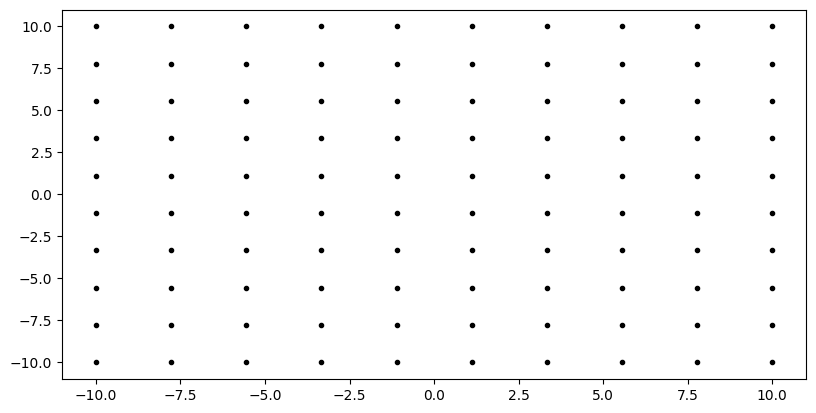

In [82]:
low, high, num_samples = -10, 10, 10
# Create meshgrid
X, Y = make_meshgrid(low, high, num_samples)
print(f"X.shape: {X.shape}, Y.shape: {Y.shape}")

fig = plt.figure(figsize=plt.figaspect(0.5))
plt.plot(X, Y, ".k");

The diagram above just means we created $X-Y$ pair sampled from the domain $-10 \leq X \leq 10$ and $-10 \leq Y \leq 10$. The resulting pair is plotted as a point in the $X-Y$ plane. For example, $(-10, 10)$ is plotted as a point in the top left corner of the $X-Y$ plane and $(-10, -10)$ is plotted as a point in the bottom left corner of the $X-Y$ plane.

You can also treat this grid as the sample space $\Omega_{X_1} \times \Omega_{X_2}$ of the random vector $\boldsymbol{X}$.

In [83]:
X_input_space = np.array([X.ravel(), Y.ravel()]).T  # N x 2 matrix
print(f"X_input_space.shape: {X_input_space.shape}")

X_input_space.shape: (100, 2)


This step is technically not necessary, as in the [scipy's tutorial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), it should just be

```python
X_input_space = np.dstack((X, Y))
```

which returns a shape of `(num_samples, num_samples, 2)`. However,
I converted it back to a 2-dimensional matrix of `(num_samples, 2)` to that
`X_input_space` represents each row as a sample from the sample space $\Omega_{X_1} \times \Omega_{X_2}$.
Since there are $10 \times 10$ grid points, then this means it has $100$ samples from the sample space $\Omega_{X_1} \times \Omega_{X_2}$.

Next, we call `multivariate_normal.pdf` to evaluate the probability density function at each point in the grid, in this case, evaluate each row $n$ $\boldsymbol{x}^{(n)}$ in the matrix `X_input_space` at the probability density function $f_{\boldsymbol{X}}(\boldsymbol{x}^{(n)})$.

In [84]:
rv = multivariate_normal(mean_vector, covariance_matrix)
Z = rv.pdf(X_input_space)
print(f"Z.shape: {Z.shape}")
print(f"X_input_space first row: {X_input_space[0]}")
print(f"Z first row: {Z[0]}")

Z.shape: (100,)
X_input_space first row: [-10. -10.]
Z first row: 4.8901731489346794e-11


Indeed the PDF of the first sample $\boldsymbol{x}^{(1)} = [-10, 10]$ is
$4.8901731489346794e-11$, which is the same as what we calculated just now.

Putting it all together, we set `num_samples = 100` for a smoother and more detailed contour plot.
But we limit the domain to be still the same, $-10 \leq X \leq 10$ and $-10 \leq Y \leq 10$.

In [85]:
low, high, num_samples = -10, 10, 100
# Create meshgrid
X, Y = make_meshgrid(low, high, num_samples)
X_input_space = np.array([X.ravel(), Y.ravel()]).T  # N x 2 matrix

rv = multivariate_normal(mean_vector, covariance_matrix)
Z = rv.pdf(X_input_space)
Z = Z.reshape(X.shape)

Note we reshaped `Z` to the shape of the grid, `(num_samples, num_samples)`
as the `contour` function expects the `Z` input to be a 2-dimensional matrix.

In [86]:
def plot_contour(
    ax: plt.Axes,
    x: np.ndarray,
    y: np.ndarray,
    z: np.ndarray,
    contourf: bool = False,
    **kwargs: Dict[str, Any]
) -> QuadContourSet:
    """Plot contours."""
    if contourf:
        contour = ax.contourf(x, y, z, **kwargs)
    else:
        contour = ax.contour(x, y, z, **kwargs)
    return contour

def plot_surface(
    ax: plt.Axes, x: np.ndarray, y: np.ndarray, z: np.ndarray, **kwargs: Dict[str, Any]
) -> mpl_toolkits.mplot3d.art3d.Poly3DCollection:
    """Plot surface."""
    surface = ax.plot_surface(x, y, z, **kwargs)
    return surface

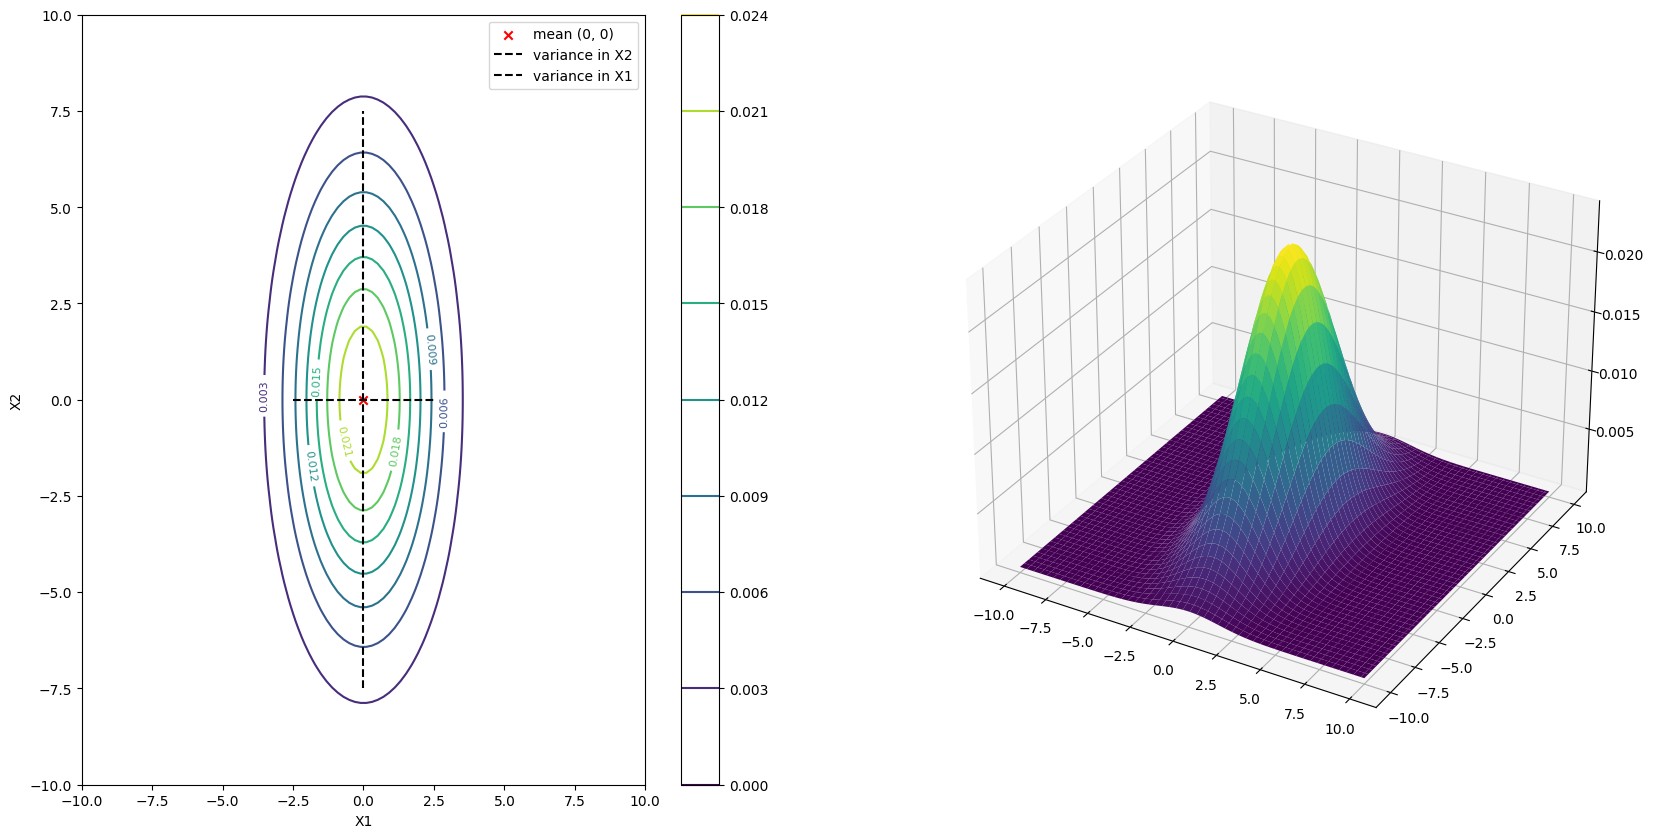

In [87]:
# Make a 3D plot
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 2, 1)
contour = plot_contour(ax, X, Y, Z, cmap="viridis")
fig.colorbar(contour, ax=ax)
plt.scatter(mean_vector[0], mean_vector[1], marker="x", color="red", label="mean (0, 0)")
plt.vlines(0, -7.5, 7.5, linestyles="dashed", colors="black", label="variance in X2")
plt.hlines(0, -2.5, 2.5, linestyles="dashed", colors="black", label="variance in X1")
plt.clabel(contour, contour.levels, inline=True, fmt="%1.3f", fontsize=8)
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()

ax = fig.add_subplot(1, 2, 2, projection="3d")
surface = plot_surface(ax, X, Y, Z, cmap="viridis", linewidth=0)
plt.show()

This contour plot is indeed an accurate representation of the probability density function of the random vector $\boldsymbol{X}$. You can indeed see the mean at the center of the plot $(0, 0)$ and the variance in
the $X_1$ and $X_2$ direction are approximately in proportion of $3$ and $15$ respectively.

To actually see the numbers via hovering, you can use plotly below (uncomment them).

In [88]:
# import plotly.graph_objects as go

# fig = go.Figure(data=[go.Surface(z=Z.reshape(X.shape))])
# fig.show()

In [89]:
# fig = go.Figure(
#     data=go.Contour(z=Z,
#     contours=dict(
#             coloring="heatmap",
#             showlabels=True,
#             labelfont=dict(size=12, color="white"),
#         )))
# fig.show()

## References and Further Readings

- [Contour Plots](https://en.wikipedia.org/wiki/Contour_plot) on Wikipedia
- [Contour Maps](https://www.khanacademy.org/math/multivariable-calculus/thinking-about-multivariable-function/ways-to-represent-multivariable-functions/a/contour-maps) on Khan Academy
- [Multivariate Gaussian Distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html) from Scipy
- [Multivariate probability density, contour plot EDA Lecture 14@Applied AI Course](https://www.youtube.com/watch?v=a2t2EQd5SC4)
- [A Tutorial on Generating & Plotting 3D Gaussian Distributions](https://towardsdatascience.com/a-python-tutorial-on-generating-and-plotting-a-3d-guassian-distribution-8c6ec6c41d03)